## 组建数据集

In [194]:
import glob
from PIL import Image
import numpy as np
import re
import pickle

In [135]:
def convert_img(img):
    nimg = np.array(img)
    ttmp = nimg.tolist()
    for row in range(len(ttmp)):
        for col in range(len(ttmp[0])):
            ttmp[row][col] = np.average(ttmp[row][col])
    return np.array(ttmp)

In [137]:
x = convert_img(img)

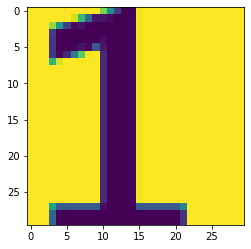

In [188]:
plt.imshow(datas[4])

In [187]:
targets[1]

'1'

In [183]:
png_files = glob.glob('datas/*/*.png')

In [189]:
datas = []
for foo in png_files:
    x = Image.open(foo)
    datas.append(convert_img(x))

In [190]:
targets = [re.search(r'(\d).png',foo).group(1) for foo in png_files]

In [191]:
datas = np.array(datas)

In [192]:
# flatten the images
n_samples = len(datas)
data = datas.reshape((n_samples, -1))/255

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.1)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data,targets , test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

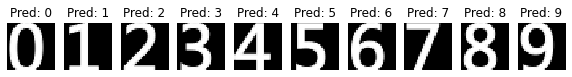

In [198]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(30, 30)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}')

In [201]:
with open('clf_model.pkl','wb') as f:
    pickle.dump(clf,f)

In [195]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

ModuleNotFoundError: No module named 'matplotlib'